# Tarea 7

1. Descargar los datos de [datos abiertos](http://www.datos.gov.co)

2. Implementar:
- Regresion Lineal
- Random Forest

## 1. Datasets analizados
- Abonados de telefonia celular: https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Telefon-a-M-vil-abonados-por-categor-a/nrst-mwx4
- accidentalidad de Armenia: https://www.datos.gov.co/Transporte/Accidentalidad-y-hechos-de-tr-nsito-de-enero-de-20/r9ab-329t
- victimas en cartagena: https://www.datos.gov.co/Inclusi-n-Social-y-Reconciliaci-n/Victimas-en-Cartagena/v287-zzav
- Familias en accion: https://www.datos.gov.co/Inclusi-n-Social-y-Reconciliaci-n/Beneficiarios-M-s-Familias-en-Acci-n/xfif-myr2

## 2. Implementacion

El dataset sobre el cual se implementa el codigo es sobre el de **`Familias en Accion`**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import pickle
import numpy as np

pd.options.display.float_format = '{:,.5f}'.format

In [2]:
f = r"data/Beneficiarios_M_s_Familias_en_Acci_n.csv.gz"
data = pd.read_csv(f, sep=',', dtype=str, na_values=['ND'], compression='gzip')

Filtrar sdolo los que recibieron el beneficio en `2018` y de un solo departamento `BOLIVAR`

In [3]:
data['FechaUltimoBeneficioAsignado'] = pd.to_datetime(data['FechaUltimoBeneficioAsignado'])
pd.concat([data['FechaUltimoBeneficioAsignado'].value_counts().sort_index(), data['FechaUltimoBeneficioAsignado'].value_counts(normalize=True).sort_index()],axis=1)

,FechaUltimoBeneficioAsignado,FechaUltimoBeneficioAsignado
1900-01-01,936008,0.23515
2013-01-01,5164,0.00130
2014-01-01,150909,0.03791
2015-01-01,23772,0.00597
2016-01-01,24885,0.00625
2017-01-01,66406,0.01668
2018-01-01,2773402,0.69674


In [4]:
filtro = (data['FechaUltimoBeneficioAsignado']==pd.to_datetime('2018-01-01'))
data = data[filtro]

In [5]:
data['NombreDepartamentoAtencion'].value_counts()

ANTIOQUIA             334639
CORDOBA               197315
BOLIVAR               179126
VALLE                 159438
NARIÑO                159431
CAUCA                 147351
MAGDALENA             135902
ATLANTICO             121362
CESAR                 110480
SANTANDER             107297
TOLIMA                105364
NORTE DE SANTANDER    102207
CUNDINAMARCA          101557
HUILA                 101229
SUCRE                 100660
BOGOTA                 70511
META                   69365
LA GUAJIRA             66244
BOYACA                 65291
CHOCO                  50097
CAQUETA                49968
CALDAS                 45911
RISARALDA              42184
PUTUMAYO               41870
CASANARE               35647
ARAUCA                 27795
QUINDIO                21071
GUAVIARE                9655
AMAZONAS                5385
SAN ANDRES              2748
VICHADA                 2562
GUAINIA                 2413
VAUPES                  1327
Name: NombreDepartamentoAtencion, dtype: in

In [6]:
filtro = (data['NombreDepartamentoAtencion']=='BOLIVAR')
data = data[filtro]

# EDA

In [7]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179126 entries, 57 to 3980515
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Bancarizado                        175821 non-null  object        
 1   CodigoDepartamentoAtencion         179126 non-null  object        
 2   CodigoMunicipioAtencion            179126 non-null  object        
 3   Discapacidad                       177423 non-null  object        
 4   EstadoBeneficiario                 179126 non-null  object        
 5   Etnia                              19184 non-null   object        
 6   FechaInscripcionBeneficiario       179126 non-null  object        
 7   Genero                             179118 non-null  object        
 8   NivelEscolaridad                   707 non-null     object        
 9   NombreDepartamentoAtencion         179126 non-null  object        
 10  NombreMunicipioAte

,Bancarizado,CodigoDepartamentoAtencion,CodigoMunicipioAtencion,Discapacidad,EstadoBeneficiario,Etnia,FechaInscripcionBeneficiario,Genero,NivelEscolaridad,NombreDepartamentoAtencion,...,TipoAsignacionBeneficio,TipoBeneficio,TipoDocumento,TipoPoblacion,RangoBeneficioConsolidadoAsignado,RangoUltimoBeneficioAsignado,FechaUltimoBeneficioAsignado,RangoEdad,Titular,CantidadDeBeneficiarios
57,SI,13,13744,NO,ACTIVO,NaN,2014-05-01,Mujer,NaN,BOLIVAR,...,MONETARIO,NaN,CC,DESPLAZADOS,3.000.001 - 4.500.000,0 - 1.300.000,2018-01-01,30-49,SI,1
85,SI,13,13744,NO,ACTIVO,NaN,2015-04-01,Mujer,NaN,BOLIVAR,...,MONETARIO,NaN,CC,DESPLAZADOS,1.500.001 - 3.000.000,0 - 1.300.000,2018-01-01,50-65,SI,1
188,SI,13,13062,NO,ACTIVO,NaN,2013-01-01,Hombre,NaN,BOLIVAR,...,MONETARIO,NaN,CC,UNIDOS,0 - 1.500.000,0 - 1.300.000,2018-01-01,>65,SI,1
286,NaN,13,13442,NO,ACTIVO,NaN,2018-02-01,Mujer,NaN,BOLIVAR,...,MONETARIO,NUTRICIÓN,CC,SISBEN,0 - 1.500.000,0 - 1.300.000,2018-01-01,18-29,SI,1
330,NaN,13,13442,NaN,ACTIVO,AFROCOLOMBIANO – NEGRO,2012-12-01,Mujer,NaN,BOLIVAR,...,MONETARIO,NUTRICIÓN,CC,SISBEN,> 6.000.001,0 - 1.300.000,2018-01-01,30-49,SI,1


In [8]:
data.isnull().sum()

Bancarizado                            3305
CodigoDepartamentoAtencion                0
CodigoMunicipioAtencion                   0
Discapacidad                           1703
EstadoBeneficiario                        0
Etnia                                159942
FechaInscripcionBeneficiario              0
Genero                                    8
NivelEscolaridad                     178419
NombreDepartamentoAtencion                0
NombreMunicipioAtencion                   0
Pais                                 175356
TipoAsignacionBeneficio                 159
TipoBeneficio                        138277
TipoDocumento                             0
TipoPoblacion                             0
RangoBeneficioConsolidadoAsignado         0
RangoUltimoBeneficioAsignado              0
FechaUltimoBeneficioAsignado              0
RangoEdad                                 0
Titular                                   0
CantidadDeBeneficiarios                   0
dtype: int64

In [9]:
for c in ['Bancarizado','EstadoBeneficiario','Pais','TipoAsignacionBeneficio','TipoBeneficio']:
    print('*'*50, c)
    print(pd.concat([data[c].value_counts(dropna=False), data[c].value_counts(dropna=False, normalize=True)], axis=1))
    print('')

************************************************** Bancarizado
     Bancarizado  Bancarizado
SI        106562      0.59490
NO         69259      0.38665
NaN         3305      0.01845

************************************************** EstadoBeneficiario
           EstadoBeneficiario  EstadoBeneficiario
ACTIVO                 177596             0.99146
NO ACTIVO                1530             0.00854

************************************************** Pais
            Pais    Pais
NaN       175356 0.97895
Colombia    2888 0.01612
COLOMBIA     856 0.00478
57            17 0.00009
169            9 0.00005

************************************************** TipoAsignacionBeneficio
           TipoAsignacionBeneficio  TipoAsignacionBeneficio
MONETARIO                   178967                  0.99911
NaN                            159                  0.00089

************************************************** TipoBeneficio
                               TipoBeneficio  TipoBeneficio
NaN    

In [10]:
data['RangoBeneficioConsolidadoAsignado'].value_counts().sort_index()

0 - 1.500.000            19602
1.500.001 - 3.000.000    38575
3.000.001 - 4.500.000    48294
4.500.001 - 6.000.000    42829
> 6.000.001              29826
Name: RangoBeneficioConsolidadoAsignado, dtype: int64

In [11]:
data.groupby(['RangoBeneficioConsolidadoAsignado','RangoUltimoBeneficioAsignado'], dropna=False).size()

RangoBeneficioConsolidadoAsignado  RangoUltimoBeneficioAsignado
0 - 1.500.000                      0 - 1.300.000                   19602
1.500.001 - 3.000.000              0 - 1.300.000                   38575
3.000.001 - 4.500.000              0 - 1.300.000                   48294
4.500.001 - 6.000.000              0 - 1.300.000                   42829
> 6.000.001                        0 - 1.300.000                   29826
dtype: int64

In [12]:
data.groupby(['RangoBeneficioConsolidadoAsignado','EstadoBeneficiario'], dropna=False).size()/len(data)

RangoBeneficioConsolidadoAsignado  EstadoBeneficiario
0 - 1.500.000                      ACTIVO               0.10691
                                   NO ACTIVO            0.00252
1.500.001 - 3.000.000              ACTIVO               0.21286
                                   NO ACTIVO            0.00250
3.000.001 - 4.500.000              ACTIVO               0.26728
                                   NO ACTIVO            0.00233
4.500.001 - 6.000.000              ACTIVO               0.23823
                                   NO ACTIVO            0.00087
> 6.000.001                        ACTIVO               0.16617
                                   NO ACTIVO            0.00033
dtype: float64

# FT ing

Definiendo el target ---> `RangoBeneficioConsolidadoAsignado`

In [13]:
data0 = data.copy()
print(data.shape, data0.shape)

(179126, 22) (179126, 22)


In [14]:
target = 'RangoBeneficioConsolidadoAsignado'

In [15]:
cols_date = ['FechaInscripcionBeneficiario','FechaUltimoBeneficioAsignado']
for c in cols_date:
    data0[c] = pd.to_datetime(data0[c])

In [16]:
filtro = data0['FechaUltimoBeneficioAsignado']==pd.to_datetime('1900-01-01')
data0.loc[filtro,'FechaUltimoBeneficioAsignado'] = data0[filtro]['FechaInscripcionBeneficiario']

In [17]:
data0['antiguedad'] = (data0['FechaUltimoBeneficioAsignado'] - data0['FechaInscripcionBeneficiario']).dt.days
data0['antiguedad'] = data0['antiguedad']/365.5

In [18]:
(data0['antiguedad']<0).value_counts()

False    178989
True        137
Name: antiguedad, dtype: int64

In [19]:
data0['CantidadDeBeneficiarios'] = pd.to_numeric(data0['CantidadDeBeneficiarios'])

In [20]:
data0['Discapacidad'] = data0['Discapacidad'].fillna('NO')
data0['TipoPoblacion'] = data0['TipoPoblacion'].fillna('ND')
data0['Bancarizado'] = data0['Bancarizado'].fillna('ND')

Encode target

In [21]:
target_labels = dict((v,k) for k,v in enumerate(data0[target].value_counts(dropna=False).sort_index().index))
target_labels

{'0 - 1.500.000': 0,
 '1.500.001 - 3.000.000': 1,
 '3.000.001 - 4.500.000': 2,
 '4.500.001 - 6.000.000': 3,
 '> 6.000.001': 4}

In [22]:
print(data0[target].value_counts().sort_index())
data0[target] = data0[target].replace(target_labels)
print(data0[target].value_counts().sort_index())

0 - 1.500.000            19602
1.500.001 - 3.000.000    38575
3.000.001 - 4.500.000    48294
4.500.001 - 6.000.000    42829
> 6.000.001              29826
Name: RangoBeneficioConsolidadoAsignado, dtype: int64
0    19602
1    38575
2    48294
3    42829
4    29826
Name: RangoBeneficioConsolidadoAsignado, dtype: int64


## Limpieza

In [23]:
data0 = data0[[c for c in data0 if c!=target]+[target]]

In [24]:
## donde la antiguedad sea positiva
data0 = data0[data0['antiguedad']>=0]

In [25]:
## variables que no se van a incluir
cols_2_drop = ['NombreMunicipioAtencion','FechaUltimoBeneficioAsignado','CodigoDepartamentoAtencion','CodigoMunicipioAtencion','FechaInscripcionBeneficiario','FechaUltimoBeneficioAsignado','Pais','TipoAsignacionBeneficio','RangoUltimoBeneficioAsignado']
data0 = data0.drop(cols_2_drop,axis=1)

In [26]:
## variables con missing >50%
cols_2_drop = (data0.isnull().sum() / len(data0))>0.5
cols_2_drop = list(cols_2_drop[cols_2_drop].index)
print(cols_2_drop)
data0 = data0.drop(cols_2_drop,axis=1)

['Etnia', 'NivelEscolaridad', 'TipoBeneficio']


Get dummies `data0`

In [27]:
data1 = pd.get_dummies(data0, prefix_sep='__', drop_first=True)
data1 = data1[[c for c in data1 if c!=target]+[target]]
print(data1.info())
data1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178989 entries, 57 to 3980515
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CantidadDeBeneficiarios            178989 non-null  int64  
 1   antiguedad                         178989 non-null  float64
 2   Bancarizado__NO                    178989 non-null  uint8  
 3   Bancarizado__SI                    178989 non-null  uint8  
 4   Discapacidad__SI                   178989 non-null  uint8  
 5   EstadoBeneficiario__NO ACTIVO      178989 non-null  uint8  
 6   Genero__Mujer                      178989 non-null  uint8  
 7   TipoDocumento__CE                  178989 non-null  uint8  
 8   TipoDocumento__No Definido         178989 non-null  uint8  
 9   TipoDocumento__RC                  178989 non-null  uint8  
 10  TipoDocumento__TI                  178989 non-null  uint8  
 11  TipoPoblacion__INDIGENAS           17

,CantidadDeBeneficiarios,antiguedad,Bancarizado__NO,Bancarizado__SI,Discapacidad__SI,EstadoBeneficiario__NO ACTIVO,Genero__Mujer,TipoDocumento__CE,TipoDocumento__No Definido,TipoDocumento__RC,...,TipoPoblacion__INDIGENAS,TipoPoblacion__SISBEN,TipoPoblacion__UNIDOS,RangoEdad__06-17,RangoEdad__18-29,RangoEdad__30-49,RangoEdad__50-65,RangoEdad__>65,Titular__SI,RangoBeneficioConsolidadoAsignado
57,1,3.66895,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,2
85,1,2.75239,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,1
188,1,4.99590,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
330,1,5.08071,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,4
356,1,5.24761,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [28]:
from sklearn.preprocessing import MinMaxScaler

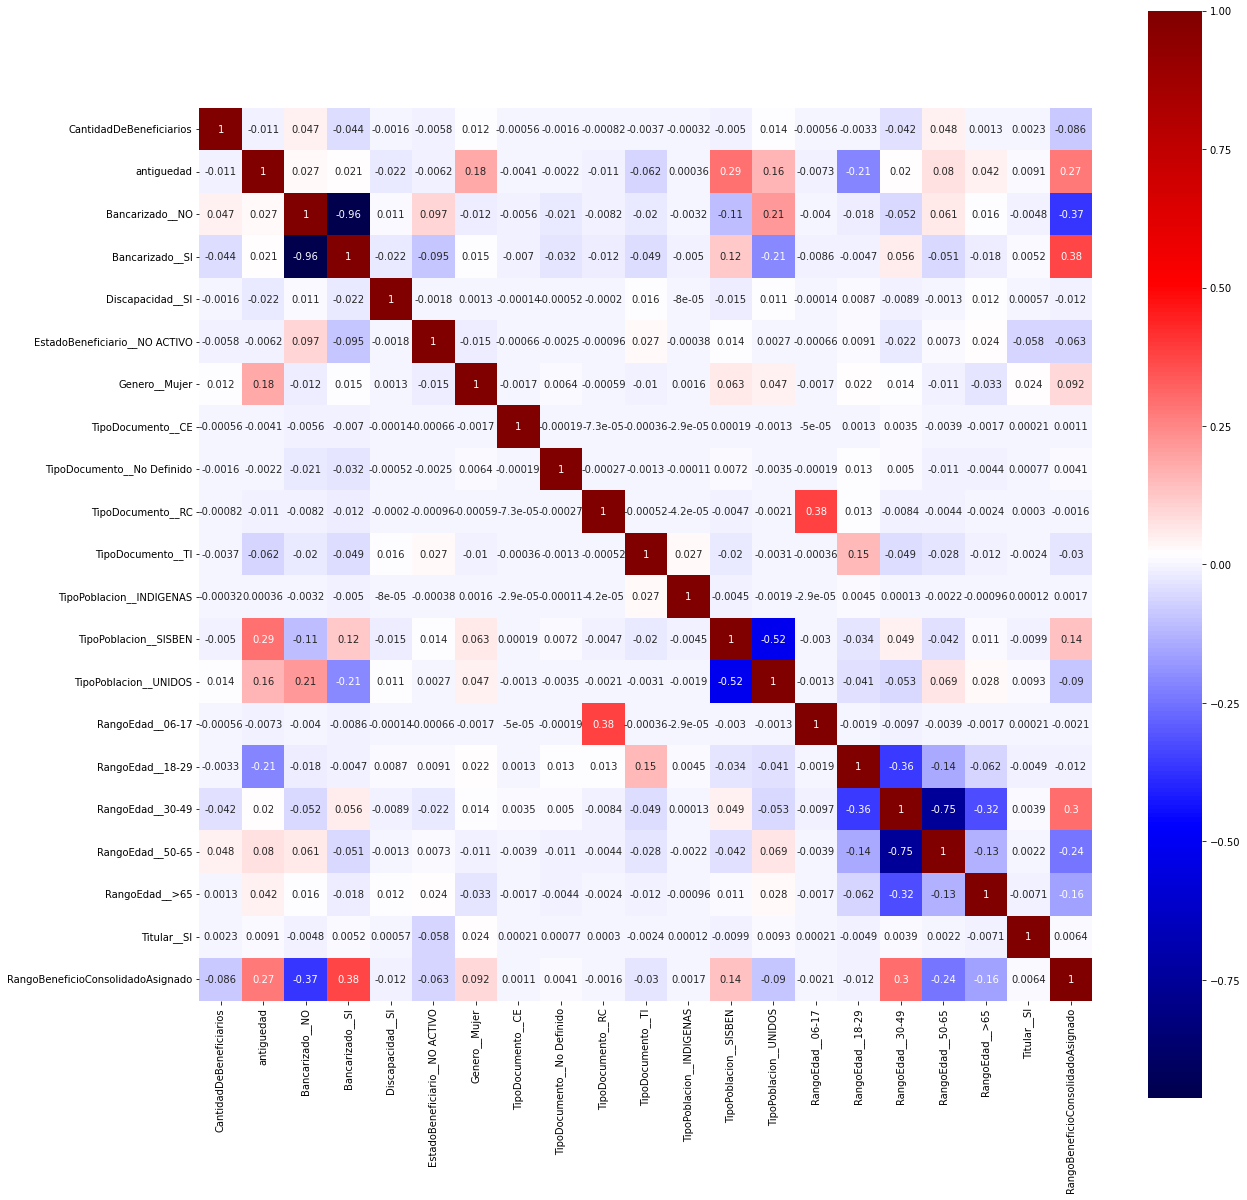

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(data1.corr(), square=True, cmap='seismic',annot=True)
plt.show()

In [30]:
data1 = data1.drop('Bancarizado__NO',axis=1)

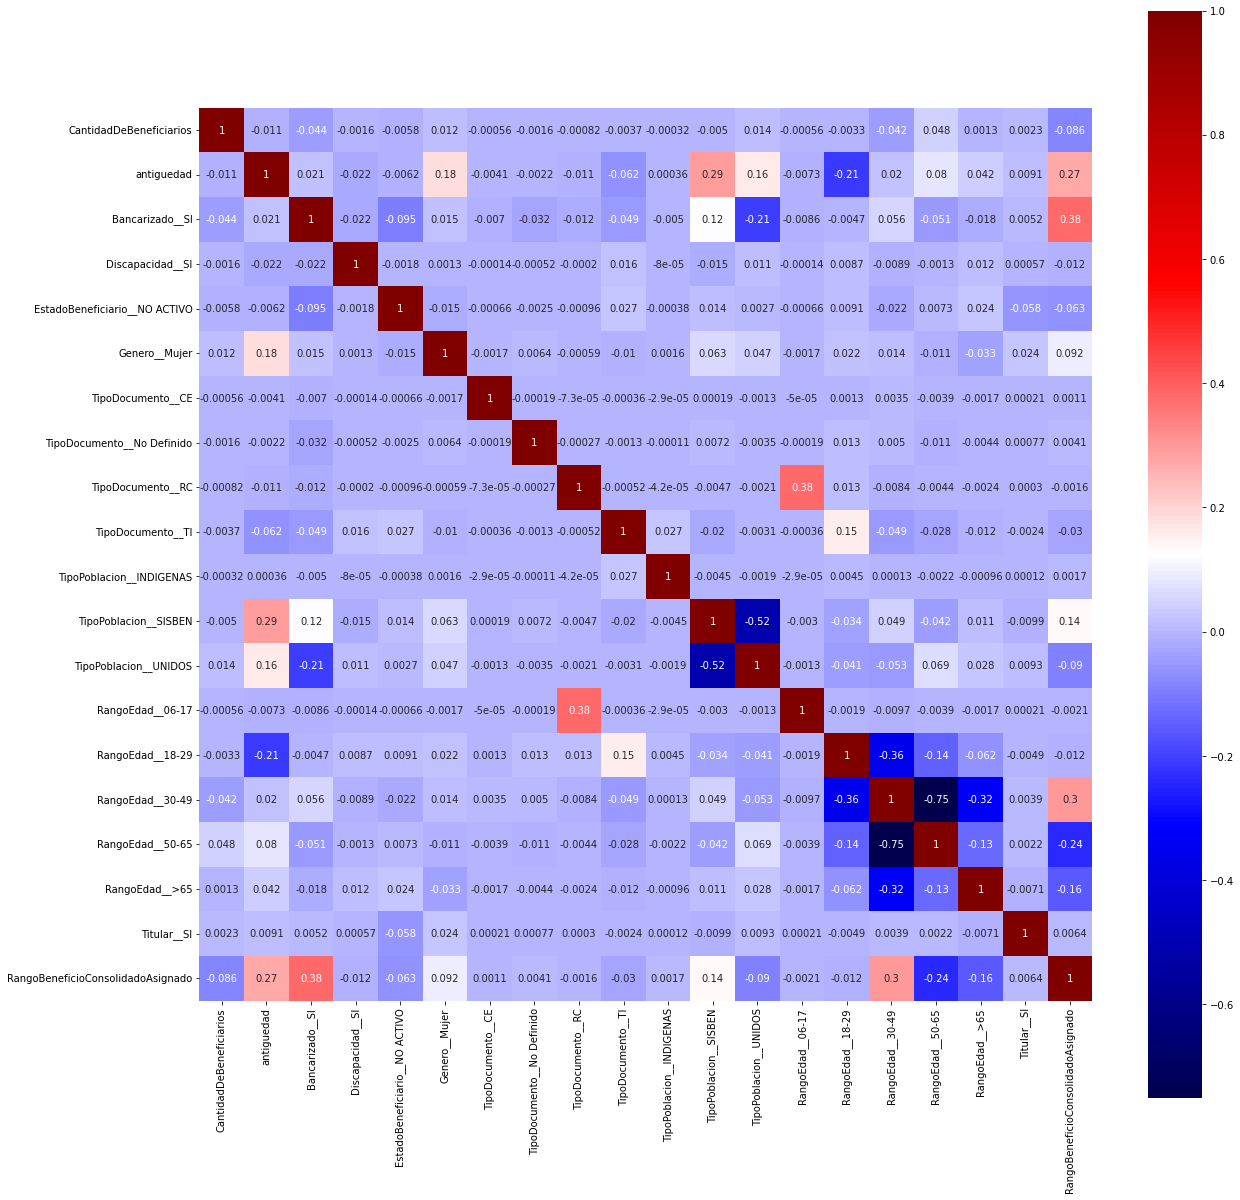

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(data1.corr(), square=True, cmap='seismic',annot=True)
plt.show()

In [33]:
cols = list(data1.drop(target,axis=1).columns)
data1 = pd.concat([
                    pd.DataFrame(MinMaxScaler().fit_transform(data1[cols]), columns=cols, index=data1.index)
                    , data1[target]
            ], axis=1
            )
data1

,CantidadDeBeneficiarios,antiguedad,Bancarizado__SI,Discapacidad__SI,EstadoBeneficiario__NO ACTIVO,Genero__Mujer,TipoDocumento__CE,TipoDocumento__No Definido,TipoDocumento__RC,TipoDocumento__TI,TipoPoblacion__INDIGENAS,TipoPoblacion__SISBEN,TipoPoblacion__UNIDOS,RangoEdad__06-17,RangoEdad__18-29,RangoEdad__30-49,RangoEdad__50-65,RangoEdad__>65,Titular__SI,RangoBeneficioConsolidadoAsignado
57,0.00000,0.69917,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,2
85,0.00000,0.52450,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,1
188,0.00000,0.95203,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0
330,0.00000,0.96820,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,4
356,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980078,0.00000,0.96820,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,2
3980225,0.00000,0.98384,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,4
3980226,0.00000,0.98384,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,4
3980264,0.00000,0.52450,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1


# ML

In [35]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [36]:
def make_data(data,target):
    X    = data.drop(target,axis=1).copy()
    y    = data0[target].copy()
    print('X.shape=', X.shape, ', y.shape=', y.shape)
    # splitting the data
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    print("x_train=",len(x_train),", x_test=",len(x_test), ", y_train=",len(y_train),", y_test=",len(y_test))
    return X, y, x_train, y_train, x_test, y_test

## Base line

In [37]:
import statsmodels.api as sm

In [38]:
X, y, x_train, y_train, x_test, y_test = make_data(data=data1,target=target)

X.shape= (178989, 19) , y.shape= (178989,)
x_train= 143191 , x_test= 35798 , y_train= 143191 , y_test= 35798


In [44]:
LRS = sm.OLS(y,sm.add_constant(X))
LRS = LRS.fit()
LRS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     RangoBeneficioConsolidadoAsignado   R-squared:                       0.321
Model:                                           OLS   Adj. R-squared:                  0.321
Method:                                Least Squares   F-statistic:                     4456.
Date:                               Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                                       15:54:52   Log-Likelihood:            -2.5777e+05
No. Observations:                             178989   AIC:                         5.156e+05
Df Residuals:                                 178969   BIC:                         5.158e+05
Df Model:                                         19                                         
Covariance Type:                           nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.2037      1.058     -0.193      0.847      -2.277       1.870
CantidadDeBeneficiarios          -8.8332      0.322    -27.407      0.000      -9.465      -8.201
antiguedad                        2.1651      0.016    136.234      0.000       2.134       2.196
Bancarizado__SI                   0.8636      0.005    170.011      0.000       0.854       0.874
Discapacidad__SI                  0.2818      0.123      2.290      0.022       0.041       0.523
EstadoBeneficiario__NO ACTIVO    -0.2815      0.026    -10.654      0.000      -0.333      -0.230
Genero__Mujer                     0.0951      0.007     13.305      0.000       0.081       0.109
TipoDocumento__CE                 0.5809      0.341      1.706      0.088      -0.087       1.248
TipoDocumento__No Definido        0.5518      0.091      6.081      0.000       0.374       0.730
TipoDocumento__RC                 0.4848      0.262      1.851      0.064      -0.028       0.998
TipoDocumento__TI                -0.1093      0.049     -2.247      0.025      -0.205      -0.014
TipoPoblacion__INDIGENAS          0.6863      0.590      1.163      0.245      -0.470       1.843
TipoPoblacion__SISBEN            -0.1029      0.006    -16.219      0.000      -0.115      -0.090
TipoPoblacion__UNIDOS            -0.2141      0.008    -26.724      0.000      -0.230      -0.198
RangoEdad__06-17                  0.1263      1.083      0.117      0.907      -1.996       2.249
RangoEdad__18-29                  0.1256      1.055      0.119      0.905      -1.941       2.193
RangoEdad__30-49                  0.1254      1.055      0.119      0.905      -1.941       2.192
RangoEdad__50-65                 -0.6685      1.055     -0.634      0.526      -2.735       1.398
RangoEdad__>65                   -0.9893      1.055     -0.938      0.348      -3.056       1.078
Titular__SI                      -0.0264      0.084     -0.316      0.752      -0.190       0.137
==============================================================================
Omnibus:                     1587.817   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1044.925
Skew:                          -0.027   Prob(JB):                    1.25e-227
Kurtosis:                       2.630   Cond. No.                     2.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong mul

In [46]:
best_pv = list(LRS.pvalues[LRS.pvalues<0.05].index)
best_pv

LRS2 = sm.OLS(y,sm.add_constant(X[best_pv]))
LRS2 = LRS2.fit()
LRS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     RangoBeneficioConsolidadoAsignado   R-squared:                       0.224
Model:                                           OLS   Adj. R-squared:                  0.224
Method:                                Least Squares   F-statistic:                     5169.
Date:                               Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                                       15:55:21   Log-Likelihood:            -2.6973e+05
No. Observations:                             178989   AIC:                         5.395e+05
Df Residuals:                                 178978   BIC:                         5.396e+05
Df Model:                                         10                                         
Covariance Type:                           nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.2033      0.015    -13.847      0.000      -0.232      -0.175
CantidadDeBeneficiarios         -10.9905      0.344    -31.935      0.000     -11.665     -10.316
antiguedad                        1.9269      0.017    116.064      0.000       1.894       1.959
Bancarizado__SI                   0.8976      0.005    165.469      0.000       0.887       0.908
Discapacidad__SI                  0.1292      0.132      0.982      0.326      -0.129       0.387
EstadoBeneficiario__NO ACTIVO    -0.3616      0.028    -12.826      0.000      -0.417      -0.306
Genero__Mujer                     0.1509      0.008     19.814      0.000       0.136       0.166
TipoDocumento__No Definido        0.7319      0.097      7.545      0.000       0.542       0.922
TipoDocumento__TI                 0.1115      0.051      2.168      0.030       0.011       0.212
TipoPoblacion__SISBEN            -0.0750      0.007    -11.083      0.000      -0.088      -0.062
TipoPoblacion__UNIDOS            -0.2479      0.009    -28.954      0.000      -0.265      -0.231
==============================================================================
Omnibus:                     7203.617   Durbin-Watson:                   0.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3334.295
Skew:                          -0.106   Prob(JB):                         0.00
Kurtosis:                       2.366   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
LRS3 = sm.OLS(y,X)
LRS3 = LRS3.fit()
LRS3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                        
======================================================================================================
Dep. Variable:     RangoBeneficioConsolidadoAsignado   R-squared (uncentered):                   0.829
Model:                                           OLS   Adj. R-squared (uncentered):              0.829
Method:                                Least Squares   F-statistic:                          4.578e+04
Date:                               Mon, 13 Jun 2022   Prob (F-statistic):                        0.00
Time:                                       15:57:31   Log-Likelihood:                     -2.5777e+05
No. Observations:                             178989   AIC:                                  5.156e+05
Df Residuals:                                 178970   BIC:                                  5.158e+05
Df Model:                                         19                                                  
Covariance Type:                           nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
CantidadDeBeneficiarios          -8.8332      0.322    -27.407      0.000      -9.465      -8.201
antiguedad                        2.1651      0.016    136.238      0.000       2.134       2.196
Bancarizado__SI                   0.8636      0.005    170.011      0.000       0.854       0.874
Discapacidad__SI                  0.2818      0.123      2.290      0.022       0.041       0.523
EstadoBeneficiario__NO ACTIVO    -0.2815      0.026    -10.655      0.000      -0.333      -0.230
Genero__Mujer                     0.0951      0.007     13.305      0.000       0.081       0.109
TipoDocumento__CE                 0.5809      0.341      1.706      0.088      -0.087       1.248
TipoDocumento__No Definido        0.5518      0.091      6.081      0.000       0.374       0.730
TipoDocumento__RC                 0.4723      0.254      1.861      0.063      -0.025       0.970
TipoDocumento__TI                -0.1093      0.049     -2.247      0.025      -0.205      -0.014
TipoPoblacion__INDIGENAS          0.6863      0.590      1.163      0.245      -0.470       1.843
TipoPoblacion__SISBEN            -0.1029      0.006    -16.219      0.000      -0.115      -0.090
TipoPoblacion__UNIDOS            -0.2141      0.008    -26.724      0.000      -0.230      -0.198
RangoEdad__06-17                 -0.0693      0.377     -0.184      0.854      -0.809       0.670
RangoEdad__18-29                 -0.0768      0.084     -0.909      0.363      -0.242       0.089
RangoEdad__30-49                 -0.0770      0.084     -0.914      0.361      -0.242       0.088
RangoEdad__50-65                 -0.8710      0.084    -10.318      0.000      -1.036      -0.706
RangoEdad__>65                   -1.1918      0.085    -14.043      0.000      -1.358      -1.025
Titular__SI                      -0.0277      0.083     -0.332      0.740      -0.191       0.136
==============================================================================
Omnibus:                     1587.881   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1044.955
Skew:                          -0.027   Prob(JB):                    1.23e-227
Kurtosis:                       2.630   Cond. No.                         481.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly speci

In [49]:
LRS4 = sm.OLS(y,X[best_pv])
LRS4 = LRS4.fit()
LRS4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                        
======================================================================================================
Dep. Variable:     RangoBeneficioConsolidadoAsignado   R-squared (uncentered):                   0.805
Model:                                           OLS   Adj. R-squared (uncentered):              0.805
Method:                                Least Squares   F-statistic:                          7.377e+04
Date:                               Mon, 13 Jun 2022   Prob (F-statistic):                        0.00
Time:                                       15:57:35   Log-Likelihood:                     -2.6983e+05
No. Observations:                             178989   AIC:                                  5.397e+05
Df Residuals:                                 178979   BIC:                                  5.398e+05
Df Model:                                         10                                                  
Covariance Type:                           nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
CantidadDeBeneficiarios         -11.1395      0.344    -32.366      0.000     -11.814     -10.465
antiguedad                        1.7392      0.010    181.460      0.000       1.720       1.758
Bancarizado__SI                   0.8835      0.005    165.736      0.000       0.873       0.894
Discapacidad__SI                  0.0828      0.132      0.629      0.529      -0.175       0.341
EstadoBeneficiario__NO ACTIVO    -0.3796      0.028    -13.472      0.000      -0.435      -0.324
Genero__Mujer                     0.1212      0.007     16.576      0.000       0.107       0.136
TipoDocumento__No Definido        0.7152      0.097      7.370      0.000       0.525       0.905
TipoDocumento__TI                 0.0597      0.051      1.163      0.245      -0.041       0.160
TipoPoblacion__SISBEN            -0.0607      0.007     -9.070      0.000      -0.074      -0.048
TipoPoblacion__UNIDOS            -0.2346      0.009    -27.561      0.000      -0.251      -0.218
==============================================================================
Omnibus:                     7470.140   Durbin-Watson:                   0.405
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3342.312
Skew:                          -0.091   Prob(JB):                         0.00
Kurtosis:                       2.356   Cond. No.                         207.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear Regression

In [50]:
# importing module
from sklearn.linear_model import LinearRegression

In [51]:
# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(x_train,y_train)
prediction_LR =  LR.predict(x_test)
prediction_LR

array([2.91410347, 2.04928242, 1.95903132, ..., 0.82449469, 2.87916697,
       1.96619878])

In [52]:
# Distribucion de las prediciones
pd.DataFrame([int(round(x,0)) for x in prediction_LR]).value_counts()

 2    15476
 3    14031
 1     5527
 0      723
-1       37
-3        3
-2        1
dtype: int64

Feature: 0 CantidadDeBeneficiarios, Score: -8.589981837960387
Feature: 1 antiguedad, Score: 2.161555387680922
Feature: 2 Bancarizado__SI, Score: 0.8648210490334219
Feature: 3 Discapacidad__SI, Score: 0.2624600876483696
Feature: 4 EstadoBeneficiario__NO ACTIVO, Score: -0.26882436899229883
Feature: 5 Genero__Mujer, Score: 0.09025109904349743
Feature: 6 TipoDocumento__CE, Score: 0.34677296708633
Feature: 7 TipoDocumento__No Definido, Score: 0.5756567724861426
Feature: 8 TipoDocumento__RC, Score: 0.7646676516652191
Feature: 9 TipoDocumento__TI, Score: -0.1615745406698531
Feature: 10 TipoPoblacion__INDIGENAS, Score: 0.707824338381284
Feature: 11 TipoPoblacion__SISBEN, Score: -0.10424621687503836
Feature: 12 TipoPoblacion__UNIDOS, Score: -0.2117117980251032
Feature: 13 RangoEdad__06-17, Score: -0.04498730336109169
Feature: 14 RangoEdad__18-29, Score: 0.3959736177321318
Feature: 15 RangoEdad__30-49, Score: 0.4026008997524247
Feature: 16 RangoEdad__50-65, Score: -0.38630666446565315
Feature: 1

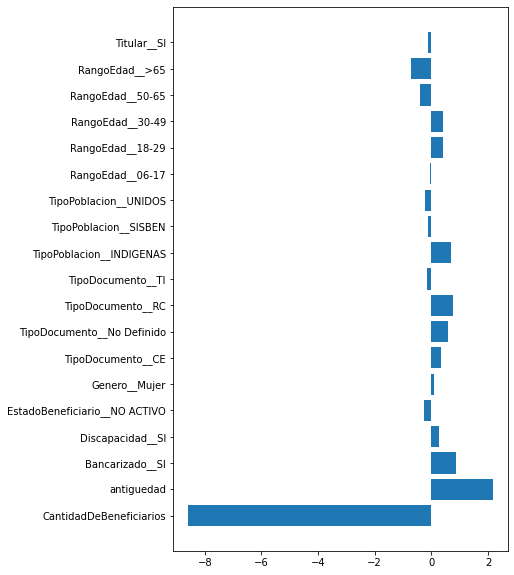

In [53]:
# get importance
var=LR.feature_names_in_
importance = LR.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: {i} {X.columns[i]}, Score: {v}')
# plot feature importance
plt.figure(figsize=(6, 10))
plt.barh(var, importance)
plt.show()

In [54]:
important=pd.DataFrame({"variable":var,"importance":importance})
important['abs'] = abs(important["importance"])
important.sort_values(by=["abs","importance"], ascending=[False,True])

,variable,importance,abs
0,CantidadDeBeneficiarios,-8.58998,8.58998
1,antiguedad,2.16156,2.16156
2,Bancarizado__SI,0.86482,0.86482
8,TipoDocumento__RC,0.76467,0.76467
17,RangoEdad__>65,-0.71850,0.71850
10,TipoPoblacion__INDIGENAS,0.70782,0.70782
7,TipoDocumento__No Definido,0.57566,0.57566
15,RangoEdad__30-49,0.40260,0.40260
14,RangoEdad__18-29,0.39597,0.39597
16,RangoEdad__50-65,-0.38631,0.38631


## Evaluacion de modelos

In [58]:
X, y, x_train, y_train, x_test, y_test = make_data(data=data1,target=target)

X.shape= (178989, 19) , y.shape= (178989,)
x_train= 143191 , x_test= 35798 , y_train= 143191 , y_test= 35798


In [59]:
## contenedor de predicciones
predict = pd.DataFrame()
predict['target'] = data0[target]

#### Statsmodels

In [60]:
LRS = sm.OLS(y,sm.add_constant(X)).fit()
predictions_LRS = LRS.predict() 
predict['LinearRegression_Statsmodels'] = predictions_LRS
predictions_LRS

array([2.36779412, 1.1956509 , 1.49129657, ..., 2.1205341 , 1.12602936,
       1.88871544])

#### Regresion Lineal

In [61]:
LR1 = LinearRegression()
##
LR1.fit(x_train,y_train)
predictions_LR1 = LR1.predict(X)
predict['LinearRegression'] = predictions_LR1
predictions_LR1

array([2.3680799 , 1.20163268, 1.49159906, ..., 2.11859213, 1.1257192 ,
       1.8902853 ])

#### Regresion Lineal (Sin intercepto)

In [62]:
## sin intercepto
LR2 = LinearRegression(fit_intercept=False)
# fitting the training data
LR2.fit(x_train,y_train)
predictions_LR2=LR2.predict(X)
predict['LinearRegression(NO costant)'] = predictions_LR2
predictions_LR2

array([2.36809417, 1.20165829, 1.49160564, ..., 2.11859185, 1.12574859,
       1.89028908])

#### Random Forest

In [63]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor

In [64]:
 # create regressor object
RF = RandomForestRegressor(n_estimators = 10, random_state=42)
# fit the regressor with x and y data
RF.fit(X, y) 
predictions_RF=RF.predict(X)
predict['RandomForest_n=10'] = predictions_RF

In [65]:
 # create regressor object
RF2 = RandomForestRegressor(n_estimators = 100, random_state=42)
# fit the regressor with x and y data
RF2.fit(X, y) 
predictions_RF2=RF2.predict(X)
predict['RandomForest_n=100'] = predictions_RF2

In [66]:
 # create regressor object
RF3 = RandomForestRegressor(n_estimators = 1000, random_state=42)
# fit the regressor with x and y data
RF3.fit(X, y) 
predictions_RF3=RF3.predict(X)
predict['RandomForest_n=1000'] = predictions_RF3

In [67]:
 # create regressor object
RF4 = RandomForestRegressor(n_estimators = 1000, random_state=42, max_depth=5)
# fit the regressor with x and y data
RF4.fit(X, y) 
predictions_RF4=RF4.predict(X)
predict['RandomForest_n=1000_mx=5'] = predictions_RF4

In [68]:
## ajuste
predict = predict.reset_index().rename(columns={'index':'id'})
predict.head()

,id,target,LinearRegression_Statsmodels,LinearRegression,LinearRegression(NO costant),RandomForest_n=10,RandomForest_n=100,RandomForest_n=1000,RandomForest_n=1000_mx=5
0,57,2,2.36779,2.36808,2.36809,2.12176,2.13292,2.13848,2.82578
1,85,1,1.19565,1.20163,1.20166,1.31611,1.28131,1.26928,1.07648
2,188,0,1.49130,1.49160,1.49161,1.46953,1.38358,1.35632,2.03993
3,330,4,1.98381,1.98054,1.98053,2.02088,2.01814,2.02019,1.96994
4,356,0,0.96429,1.04476,1.04763,1.20711,0.99757,0.97932,1.17758


# Metrics

In [70]:
# importing r2_score module
from sklearn.metrics import r2_score, mean_squared_error

In [71]:
models = {
    'LinearRegression(Statsmodels)': {
        'model': LR
        , 'r2_score': r2_score(y,predictions_LRS)
        , 'rms2': np.sqrt(mean_squared_error(y,predictions_LRS))
    }
    , 'LinearRegression': {
        'model': LR
        , 'r2_score': r2_score(y,predictions_LR1)
        , 'rms2': np.sqrt(mean_squared_error(y,predictions_LR1))
    }
    , 'LinearRegression(NO costant)': {
        'model': LR2
        , 'r2_score': r2_score(y,predictions_LR2)
        , 'rms2': np.sqrt(mean_squared_error(y,predictions_LR2))
    }
    , 'RandomForest_n=10': {
        'model': RF
        , 'r2_score': r2_score(y,predictions_RF)
        , 'rms2': np.sqrt(mean_squared_error(y,predictions_RF))
    }
    , 'RandomForest_n=100':{
        'model': RF2
        , 'r2_score': r2_score(y,predictions_RF2)
        , 'rms2': np.sqrt(mean_squared_error(y,predictions_RF2))
    }
    , 'RandomForest_n=1000':{
        'model': RF3
        , 'r2_score': r2_score(y,predictions_RF3)
        , 'rms2': np.sqrt(mean_squared_error(y,predictions_RF3))
    }
    # , 'RandomForest_n=1000_mx=5':{
    #     'model': RF4
    #     , 'r2_score': r2_score(y,predictions_RF4)
    #     , 'rms2': np.sqrt(mean_squared_error(y,predictions_RF4))
    # }
}
models

{'LinearRegression(Statsmodels)': {'model': LinearRegression(),
  'r2_score': 0.32112235811701817,
  'rms2': 1.0214556841587898},
 'LinearRegression': {'model': LinearRegression(),
  'r2_score': 0.3210894639845502,
  'rms2': 1.021480430511823},
 'LinearRegression(NO costant)': {'model': LinearRegression(fit_intercept=False),
  'r2_score': 0.3210895592737679,
  'rms2': 1.0214803588263288},
 'RandomForest_n=10': {'model': RandomForestRegressor(n_estimators=10, random_state=42),
  'r2_score': 0.3702481721489035,
  'rms2': 0.9838037982256401},
 'RandomForest_n=100': {'model': RandomForestRegressor(random_state=42),
  'r2_score': 0.37064242294322536,
  'rms2': 0.9834957989982249},
 'RandomForest_n=1000': {'model': RandomForestRegressor(n_estimators=1000, random_state=42),
  'r2_score': 0.3706763539267014,
  'rms2': 0.9834692867016218}}

In [72]:
# se prefiere un menor RMSE
pd.DataFrame.from_dict(models,orient='index').drop('model',axis=1).sort_values('rms2')

,r2_score,rms2
RandomForest_n=1000,0.37068,0.98347
RandomForest_n=100,0.37064,0.98350
RandomForest_n=10,0.37025,0.98380
LinearRegression(Statsmodels),0.32112,1.02146
LinearRegression(NO costant),0.32109,1.02148
LinearRegression,0.32109,1.02148


## Plotting

In [73]:
## data structure for plotting
predict_plt = predict.drop('RandomForest_n=1000_mx=5',axis=1)
predict_plt = predict_plt.melt(id_vars=['id','target'], var_name='model', value_name='predict')
predict_plt.head()

,id,target,model,predict
0,57,2,LinearRegression_Statsmodels,2.36779
1,85,1,LinearRegression_Statsmodels,1.19565
2,188,0,LinearRegression_Statsmodels,1.49130
3,330,4,LinearRegression_Statsmodels,1.98381
4,356,0,LinearRegression_Statsmodels,0.96429


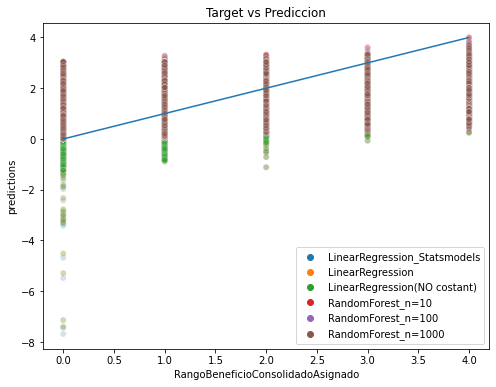

In [74]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(data=predict_plt, x="target", y="predict", alpha=0.2, hue="model")
u=np.linspace(data0[target].min(),data0[target].max(),5)
plt.plot(u,u)
plt.xlabel(target)
plt.ylabel("predictions")
plt.legend()
plt.title("Target vs Prediccion")
fig.savefig(f'fig1.png')
plt.show()

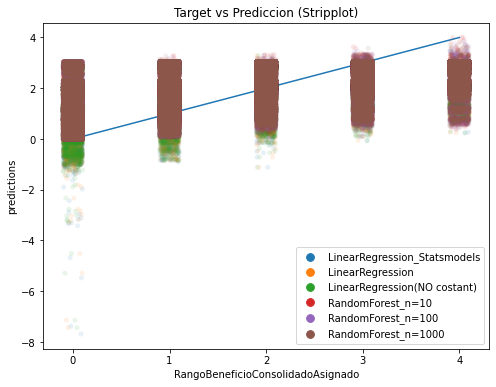

In [75]:
fig = plt.figure(figsize=(8,6))
sns.stripplot(data=predict_plt, x="target", y="predict", alpha=0.1, hue="model")
u=np.linspace(data0[target].min(),data0[target].max(),5)
plt.plot(u,u)
plt.xlabel(target)
plt.ylabel("predictions")
plt.legend()
plt.title("Target vs Prediccion (Stripplot)")
fig.savefig(f'fig2.png')
plt.show()

In [76]:
from sklearn import tree

In [77]:
def plot_r_tree(model,i,target):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,8), dpi=800)
    tree.plot_tree(model.estimators_[i],
                feature_names = X.columns, 
                class_names=[target],
                filled = True, fontsize=4)
    fig.savefig(f'rf_individualtree_{i}.png')
    fig.show()
    return

In [78]:
plot_r_tree(model=RF4,i=0,target=target)

C:\Users\dherrera\AppData\Local\Temp\8\ipykernel_48236\1762380682.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


# Entregable
- Nombre de la ponencia
- autor de la ponencia
- descripcion del problema
- descripcion de los datos
- metodologia usada: lineal y rf
- que resultados obtuvo
- trabajo futuro
- un grafico final

Entregable: PDF, maximo 1 pag
